In [2]:
from collections import namedtuple
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# import typing # 引入typing模块,用于类型标注

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [3]:
# 定义参数具名元组(无类型)
Params = namedtuple('Params', ['beta', 'gamma','mu', 'k', 'nu', 'delta'])

# 模型定义
def edited_model(y, t, params:Params):
    S, I, E, R, D = y
    beta, gamma, mu, k, nu, delta = params.beta, params.gamma, params.mu, params.k, params.nu, params.delta
    N = S + I + E + R + D
    dSdt = -k * beta * S * I / N - nu * S
    dIdt = k * beta * S * I / N - gamma * I - mu * I - delta * I
    dEdt = delta * I - gamma * E - mu * E
    dRdt = gamma * (I + E)
    dDdt = mu * (I + E)
    return [dSdt, dIdt, dEdt, dRdt, dDdt]


# 求解模型

def solve_model(
        y0 = [990, 10, 0, 0, 0],
        args = Params( beta  = 0.3, gamma = 0.1, mu    = 0.015, k     = 1, nu    = 0, delta = 0 ),
        t = np.arange(0,80,1)
        ):

    # 求解模型
    solution = odeint(edited_model, y0, t, args=(args,))
    return solution, t


# 绘图
def plot_model(solution,
               t : np.ndarray,
               title = None,
               turn_on =(True,True,True,True,True)
               ):
    # 绘制曲线
    fig  = plt.figure(figsize=(6,4))
    ax = fig.add_subplot()

    

    # 定义标题
    tilles = ['易感者 S', '感染者 I', '隔离者 E', '免疫者 R', '死亡者 D']
    if title : plt.title(title)
    # 绘制曲线

    # colors = ['r','g','b','y','m']
    
    for i,titlle in enumerate(tilles):
        if turn_on[i]:
            plt.plot(t, solution[:,i],
                    #  color=colors[i], 
                     label=titlle)
    plt.xlabel('时间',fontsize=12)
    plt.ylabel('人数',fontsize=12)
    plt.grid(True,axis='y')
    plt.legend(loc='best',fontsize=12)
    plt.savefig(f'../figures/{title}_{turn_on[0]}.png')
    plt.show()

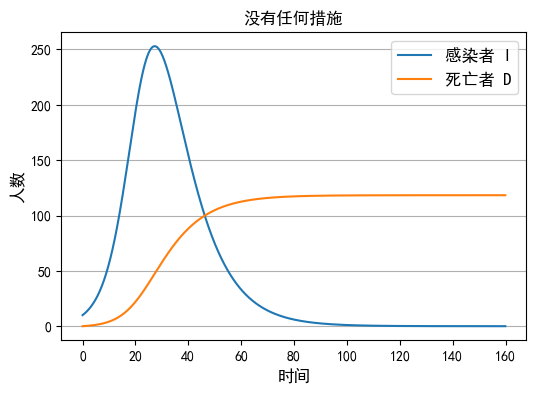

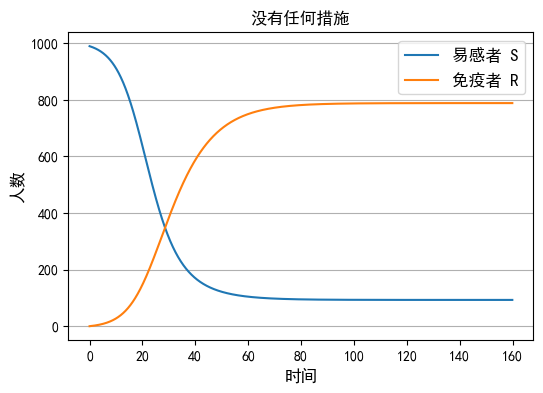

In [4]:
prarams = Params( 
    beta  = 0.3, 
    gamma = 0.1, 
    mu    = 0.015, 
    k     = 1, 
    nu    = 0, 
    delta = 0, 
    )
solution,t = solve_model( args=prarams, t=np.arange(0,160,0.1) )

titlle = "没有任何措施"

plot_model(solution,t,title=titlle,turn_on=(0,1,0,0,1))
plot_model(solution,t,title=titlle,turn_on=(1,0,0,1,0))

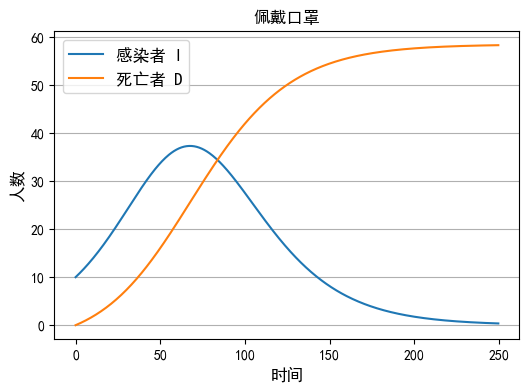

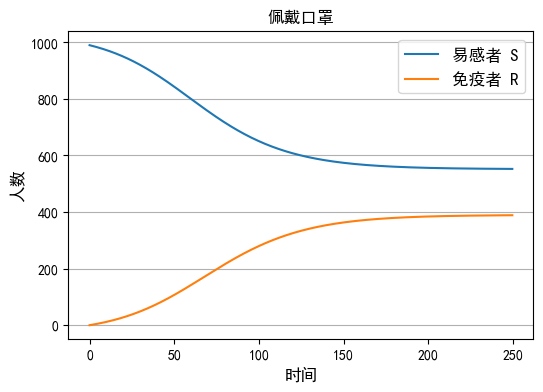

In [5]:
prarams = Params( 
    beta  = 0.3, 
    gamma = 0.1, 
    mu    = 0.015, 
    k     = 0.5, 
    nu    = 0, 
    delta = 0
    )
solution,t = solve_model(args=prarams,t=np.arange(0,250,0.5))

titlle = "佩戴口罩"

plot_model(solution,t,title=titlle,turn_on=(0,1,0,0,1))
plot_model(solution,t,title=titlle,turn_on=(1,0,0,1,0))

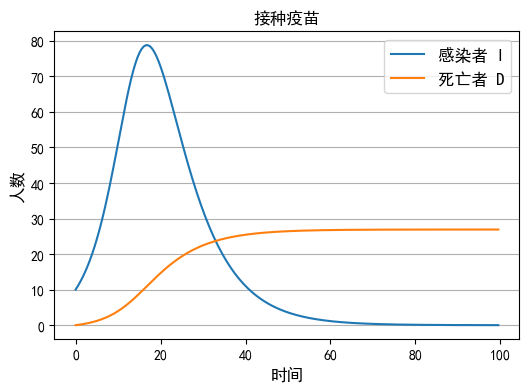

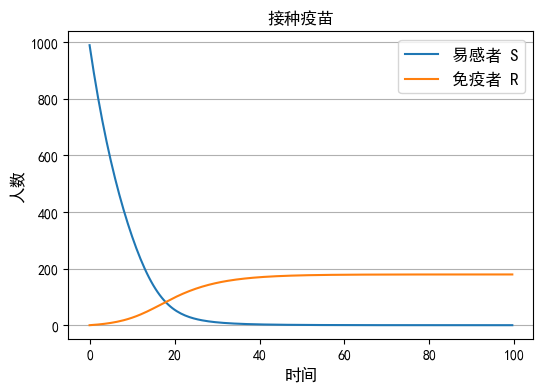

In [6]:
prarams = Params( 
    beta  = 0.3, 
    gamma = 0.1, 
    mu    = 0.015, 
    k     = 1, 
    nu    = 0.1, 
    delta = 0
    )
solution,t = solve_model(args=prarams,t=np.arange(0,100,0.5))

titlle = "接种疫苗"

plot_model(solution,t,title=titlle,turn_on=(0,1,0,0,1))
plot_model(solution,t,title=titlle,turn_on=(1,0,0,1,0))

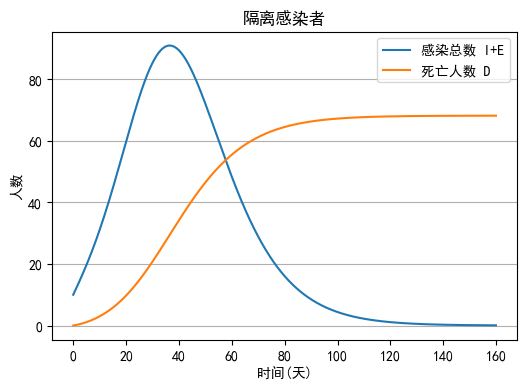

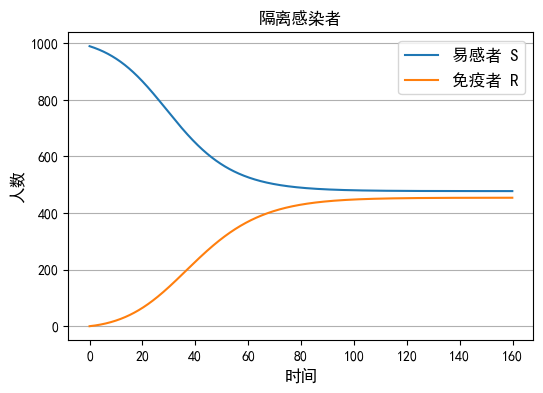

In [7]:
prarams = Params( 
    beta  = 0.3, 
    gamma = 0.1, 
    mu    = 0.015, 
    k     = 1, 
    nu    = 0, 
    delta = 0.1, 
    )
solution,t = solve_model( args=prarams, t=np.arange(0,160,0.1) )

titlle = "隔离感染者"
plt.figure(figsize=(6,4))
plt.plot(t,solution[:,2]+solution[:,1],label="感染总数 I+E")
plt.plot(t,solution[:,4],label="死亡人数 D")
plt.legend()
plt.xlabel("时间(天)")
plt.ylabel("人数")
plt.title(titlle)
plt.grid(True,axis="y")
plt.savefig(f"../figures/{titlle}_0.png")
# plot_model(solution,t,title=titlle,turn_on=(0,1,1,0,1))
plot_model(solution,t,title=titlle,turn_on=(1,0,0,1,0))

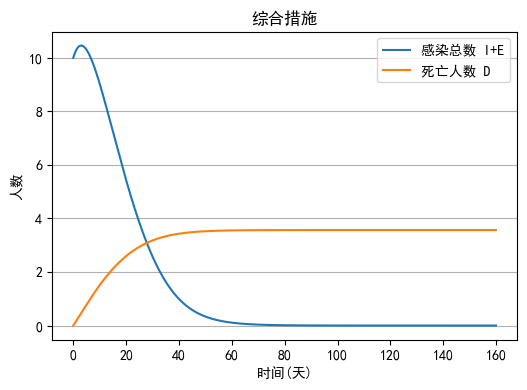

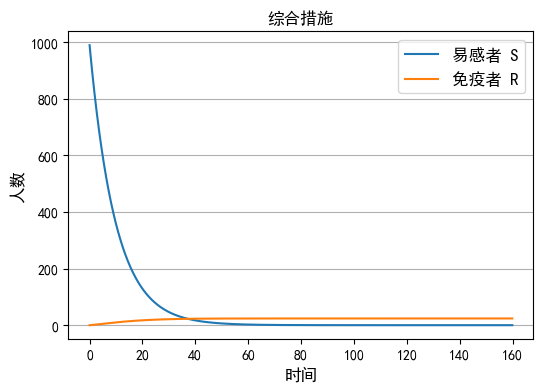

In [8]:
prarams = Params( 
    beta  = 0.3, 
    gamma = 0.1, 
    mu    = 0.015, 
    k     = 0.5, 
    nu    = 0.1, 
    delta = 0.1, 
    )
solution,t = solve_model( args=prarams, t=np.arange(0,160,0.1) )

titlle = "综合措施"
plt.figure(figsize=(6,4))
plt.plot(t,solution[:,2]+solution[:,1],label="感染总数 I+E")
plt.plot(t,solution[:,4],label="死亡人数 D")
plt.legend()
plt.xlabel("时间(天)")
plt.ylabel("人数")
plt.title(titlle)
plt.grid(True,axis="y")
plt.savefig(f"../figures/{titlle}_0.png")
# plot_model(solution,t,title=titlle,turn_on=(0,1,1,0,1))
plot_model(solution,t,title=titlle,turn_on=(1,0,0,1,0))

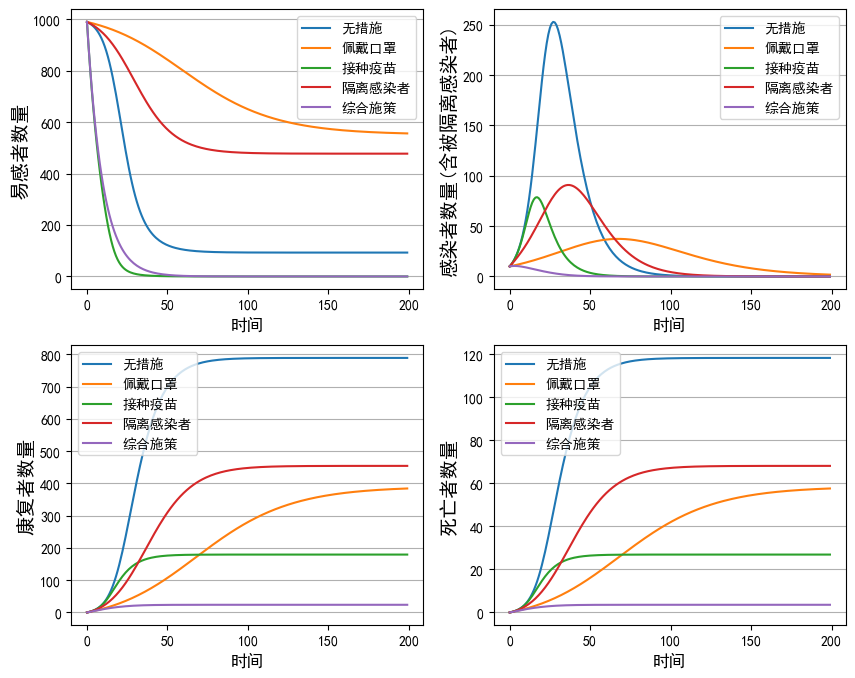

In [30]:
args = [
    Params(0.3, 0.1, 0.015, 1, 0, 0),
    Params(0.3, 0.1, 0.015, 0.5, 0, 0),
    Params(0.3, 0.1, 0.015, 1, 0.1, 0),
    Params(0.3, 0.1, 0.015, 1, 0, 0.1),
    Params(0.3, 0.1, 0.015, 0.5, 0.1, 0.1),
]

fig, axes = plt.subplots(2,2,figsize=(10, 8))

措施 = ['无措施', '佩戴口罩', '接种疫苗', '隔离感染者','综合施策']

for n,arg in enumerate(args):
    solution,t = solve_model(args=arg,t=np.arange(0,200,1))
    S, I, E, R, D = solution.T
    for i,Y in enumerate([S, I+E, R, D]):
        axes[i//2,i%2].plot(t, Y, label=f'{措施[n]}')

for ax in axes.flatten():
    ax.set_xlabel('时间', fontsize=12)
    # ax.set_ylabel('人数', fontsize=12)
    ax.grid(True, axis='y')
    ax.legend(loc='best')

# 设置子图标题
axes[0, 0].set_ylabel('易感者数量', fontsize=14)
axes[0, 1].set_ylabel('感染者数量(含被隔离感染者)', fontsize=14)
axes[1, 0].set_ylabel('康复者数量', fontsize=14)
axes[1, 1].set_ylabel('死亡者数量', fontsize=14)

plt.savefig('../figures/prob_3.png')